## Movie Rating Data from Three Data Sources

Merging the Data and Storing in a Database/Visualizing Data

Now that you have cleaned and transformed your 3 datasets, you need to load them into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options). You will want to load each dataset into SQL Lite as an individual table and then you must join the datasets together in Python into 1 dataset.

Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source (meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).

For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.

PowerBI is a free tool that could be used – Tableau only has a free web author. If your use Tableau/PowerBI you need to submit a PDF with your assignment vs the Tableau/PowerBI file.

Submit your code for merging and storing in the database, with your code for the visualizations along with a 250-500-word summary of what you learned and had to do to complete the project. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

In [42]:
import sqlite3
import pandas as pd

In [121]:
with sqlite3.connect("termproject.db") as conn:
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys = 1")
    sql = """
    SELECT * FROM moviescsv
    JOIN moviesapi ON moviescsv.title = moviesapi.title
    """

In [122]:
csvapi = pd.read_sql_query(sql, conn)

In [123]:
csvapi.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'csv_votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', '', 'title', 'api_year',
       'users_rating', 'votes', 'metascore', 'runtime', 'directors'],
      dtype='object')

In [124]:
with sqlite3.connect("termproject.db") as conn:
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys = 1")
    sql2 = """
    SELECT * FROM moviescsv
    JOIN moviesapi ON moviescsv.title = moviesapi.title
    JOIN moviesurldata ON moviescsv.title = moviesurldata.movie
    """

In [125]:
csvapiurl = pd.read_sql_query(sql2, conn)

In [126]:
csvapiurl.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'csv_votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', '', 'title', 'api_year',
       'users_rating', 'votes', 'metascore', 'runtime', 'directors', '',
       'Rank', 'Movie', 'ReleaseDate', 'Distributor', 'Genre', '2018 Gross',
       'Tickets Sold'],
      dtype='object')

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

(array([ 18.,  39., 117., 176., 216., 255., 182.,  68.,  18.,   7.]),
 array([1.2 , 2.03, 2.86, 3.69, 4.52, 5.35, 6.18, 7.01, 7.84, 8.67, 9.5 ]),
 <BarContainer object of 10 artists>)

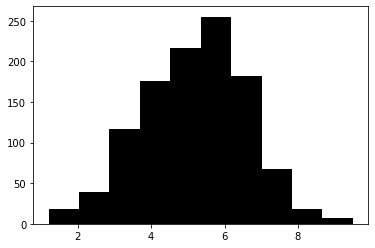

In [128]:
plt.hist(csvapi.users_rating, bins=10, color='k')

In [129]:
movieapi_votes = csvapi['users_rating']

<AxesSubplot:>

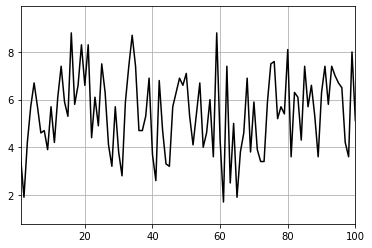

In [130]:
movieapi_votes.plot(kind='line', style='k-', xlim=(1, 100), grid=True)

In [131]:
sub_csvapi = csvapi[csvapi["year"] > 2010]

In [132]:
sub_csvapi.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'csv_votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', '', 'title', 'api_year',
       'users_rating', 'votes', 'metascore', 'runtime', 'directors'],
      dtype='object')

In [133]:
#pivot to capture years of data since 2000
pivot = pd.pivot_table(sub_csvapi, columns=['year'], values=['avg_vote','users_rating'], aggfunc='mean')

In [145]:
sub2_csvapi = csvapi[csvapi['year'] > 2017]

In [146]:
sub2_csvapi

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,reviews_from_users,reviews_from_critics,,title,api_year,users_rating,votes,metascore,runtime,directors
117,tt0360556,Fahrenheit 451,Fahrenheit 451,2018,2018-05-20,"Drama, Sci-Fi, Thriller",100,USA,English,Ramin Bahrani,...,206,74,51216,Fahrenheit 451,2018.0,4.9,"16,475",,100 min,['Ramin Bahrani']
126,tt0427543,A Million Little Pieces,A Million Little Pieces,2018,2019-12-06,Drama,113,USA,English,Sam Taylor-Johnson,...,36,23,51648,A Million Little Pieces,2018.0,6.2,"1,298",45.0,113 min,['Sam Taylor-Johnson']
144,tt0859635,Super Troopers 2,Super Troopers 2,2018,2018-07-12,"Comedy, Crime, Mystery",100,USA,English,Jay Chandrasekhar,...,207,93,50043,Super Troopers 2,2018.0,6.0,"22,886",41.0,,['Jay Chandrasekhar']
149,tt0972544,Back Roads,Back Roads,2018,2018-12-07,"Crime, Drama, Thriller",101,USA,English,Alex Pettyfer,...,47,24,49123,Back Roads,2018.0,6.6,"3,198",42.0,101 min,['Alex Pettyfer']
152,tt10199664,Adam,Adam,2019,2020-02-05,Drama,98,"Morocco, France, Belgium",Arabic,Maryam Touzani,...,1,21,27711,Adam,2018.0,5.5,77,,72 min,['Maria Solrun']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,tt9369332,Halloween Horror Tales,Halloween Horror Tales,2018,2018-11-29,"Horror, Thriller",77,USA,English,Jeff Kirkendall,...,7,4,30109,Halloween Horror Tales,2018.0,1.8,136,,77 min,['Jeff Kirkendall']
1092,tt9459550,American Kamasutra,American Kamasutra,2018,2018-12-13,"Drama, Romance",88,USA,English,Jacky St. James,...,11,,46936,American Kamasutra,2018.0,2.9,298,,88 min,['Jacky St. James']
1093,tt9477532,Greta,Greta,2019,2019-10-10,Drama,97,Brazil,Portuguese,Armando PraÃ§a,...,,12,52051,Greta,2018.0,6.0,"22,405",54.0,98 min,['Neil Jordan']
1094,tt9509866,The Guy Who Didn't Like Musicals,The Guy Who Didn't Like Musicals,2018,2018-12-23,"Comedy, Musical",112,USA,English,Nick Lang,...,4,,41117,The Guy Who Didn't Like Musicals,2018.0,8.7,296,,112 min,['Nick Lang']


In [147]:
sub2_csvapi.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'csv_votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', '', 'title', 'api_year',
       'users_rating', 'votes', 'metascore', 'runtime', 'directors'],
      dtype='object')

In [148]:
pivot

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
avg_vote,5.072727,5.225000,5.150000,5.347059,4.511111,5.315385,4.723529,5.052500,5.426667,6.30
users_rating,5.063636,5.941667,5.585714,5.211765,5.738889,4.884615,5.205882,5.054875,5.713333,4.25


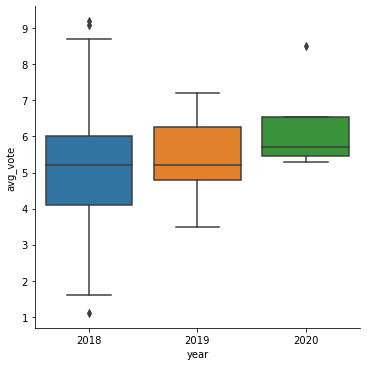

In [149]:
sns.catplot(x='year', y='avg_vote', kind='box', data=sub2_csvapi)

In [98]:
comp2

0       59,063
1          240
2           15
3           43
4        6,160
         ...  
1091       136
1092       298
1093    22,405
1094       296
1095       156
Name: votes, Length: 1096, dtype: object

C:\Users\kozfa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_vote', ylabel='users_rating'>

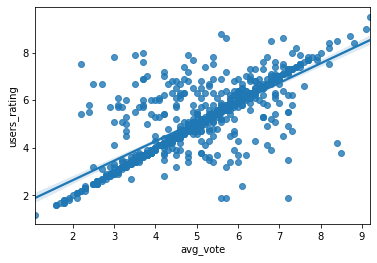

In [30]:
sns.regplot('avg_vote', 'users_rating', data=sub_csvapi)

In [150]:
with sqlite3.connect("termproject.db") as conn:
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys = 1")
    sql3 = """
    SELECT * FROM moviesurldata
    """

In [151]:
url = pd.read_sql_query(sql3, conn)

In [152]:
url.columns

Index(['', 'Rank', 'Movie', 'ReleaseDate', 'Distributor', 'Genre',
       '2018 Gross', 'Tickets Sold'],
      dtype='object')

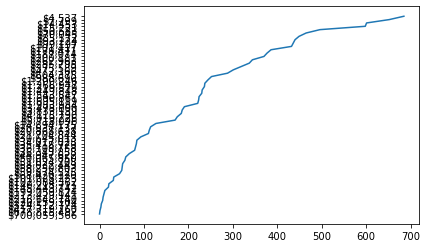

In [176]:
plt.plot('2018 Gross', data=url[url['Genre']=='Action'])

In [190]:
grouped = url['Tickets Sold'].groupby(url['Genre'])

Populating the interactive namespace from numpy and matplotlib


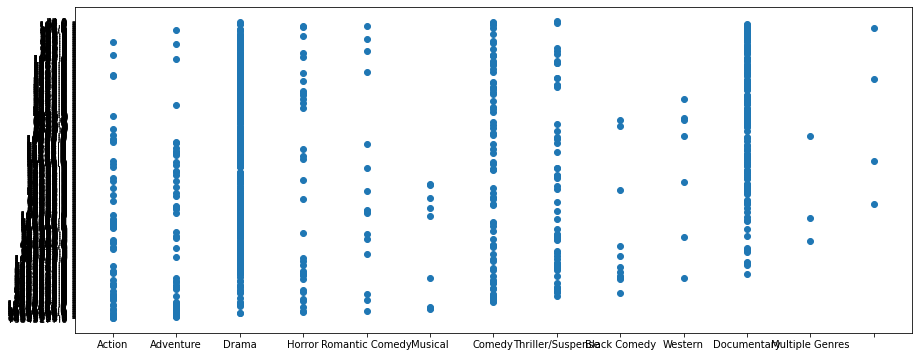

In [198]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)
plt.scatter('Genre', 'Tickets Sold', data=url)

# Summary

To complete the term project I needed to do the following:
1. I installed sql lite tools to load my data to include the csv file, url data, and api data into separate tables in the database. 
2. I made several updates to the tables and as I went along. I included the datatype value in the table in order to create the visualizations. I have to believe I could have assigned datatypes in python but chose to create that permanently into the tables. I was impressed at how the database commits the changes of the datatypes by excuting a CREATE TABLE script and gives you the table in the format requested. 
3. Once the tables were in place I created my jupyter notebook to read the data into my notebook. I created a JOIN with the csv and url file and a JOIN with the csv and api data. I used the title to create the join.
4. Next I started building my subsets of data to create the visualizations I want. There was some additional data wrangling I had to do in order to get the data to populate appropriately to make the charts. 
5. I created one histogram, and based on previous classes in this Masters program, I should probably create histograms for each of the fields I want to evaluate.
6. I developed a line chart for a portion of the data to show me where the user ratings are primarly.
7. The box and whiskers visualization gives me an idea of average votes for three of the release years.
8. The scatter plot shows a trend line related to the average rating to the number of votes, as the ratings go up so do the votes.
9. I finished up with a line chart and a scatter chart looking at the different genres either individually or as a group. On the last chart I looked at how to expand the view in jupyter notebook so I can see all the genres.

## What did I learn from this project?

The hardest part of this project was the subject matter and what to use for data. Once I figured out that we needed a csv, url based, and api source for our data, I was then able to get what I needed to build my data source. I was apprehensive about the url and api data pulls, but was happy I was able to figure how how to pull that kind of data. 

I spent a large portion of time working on the api data. I was able to get the key and access the dataset but I just could not figure out how to pull in the amount of data needed to satisfy the project. My resolve was to find a JSON dataset, which is the format of most all APIs and work with that data in jupyter notebook and successfully wrangle it.

I really enjoyed the web scraping methods and the url pull from the web. It's such a challenge to pull web data and I like the idea of carving out the data I want from the html structure.

Working with the database portion was a good refresher and was a nice review of databases to work with the SQLlite product and what it has to offer on the free platform.

Making the visualizations goes back to how well you know your data and how well it was cleaned prior to using it. When I was working with larger amounts of data, I needed to take a look at what I really needed to have a readable visualization. It's imprtant to get the data laid out in a format to create the appropriate visualization. I did a large amount of experimenting and I think it takes some of that to get the best out of your data.